In [356]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [357]:
class IrisNet(nn.Module):
    def __init__(self, input_features = 4, h1 = 8, h2 = 9, output_size = 3):
        # Input layer(4 features of the flower) -->
        # Hidden layer 1 (no of neurons) -->
        # H2(n) -->
        # Output (3 classes of the iris flower)
        super().__init__() #Instanctiate our nn.Module
        self.fc1 = nn.Linear(input_features, h1)  # Input layer to hidden layer
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_size)  # Hidden layer to output layer
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [358]:
# Pick a manual seed for randomization
torch.manual_seed(50)
# Create instance of the Network
model = IrisNet()

In [359]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


In [360]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [361]:
#Change large colum strings to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

/tmp/ipykernel_5147/2001672143.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [362]:
# Train Test Split, Set X, y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [363]:
# Convert these to numpy arrays
X = X.values 
y = y.values


In [364]:
from sklearn.model_selection import train_test_split

In [365]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [366]:
#Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [367]:
#Convert y labels to long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [368]:
# Set criterion of model to measure the error, how far off from the predictions are we
criterion = nn.CrossEntropyLoss()
# Choose Adam optimizer, set learning rate lr( if error doesn't go down after a number of iterations(epochs) we lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [369]:
model.parameters

<bound method Module.parameters of IrisNet(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [370]:
# Train our model 
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get predicted results

    # Measure the error, its going to be high at first
    loss = criterion(y_pred, y_train) # Predicted value vs the y_train value

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # Print every 10 epoch
    if i % 10 == 0:
        print(f'Epoch: {i} and loss: {loss}')

        # Do some backpropagation:take the error rate and feed it back through the network to fine tune the weights
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    

Epoch: 0 and loss: 1.1180381774902344
Epoch: 10 and loss: 1.0925915241241455
Epoch: 20 and loss: 1.0695574283599854
Epoch: 30 and loss: 1.047658085823059
Epoch: 40 and loss: 1.0262726545333862
Epoch: 50 and loss: 1.0047558546066284
Epoch: 60 and loss: 0.9830245971679688
Epoch: 70 and loss: 0.9615724086761475
Epoch: 80 and loss: 0.9406844973564148
Epoch: 90 and loss: 0.918308436870575


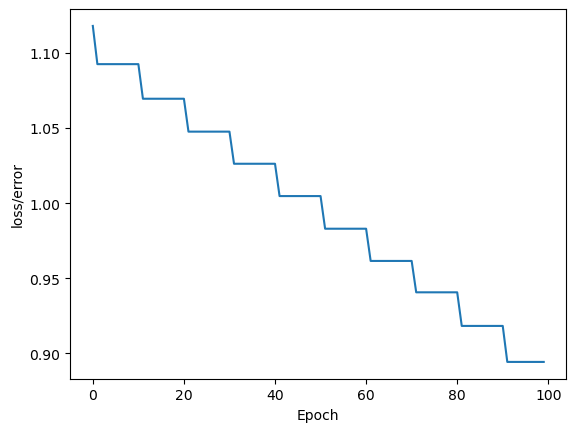

In [371]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("Epoch")
plt.show()

In [372]:
# Evaluate our model on test data set (validate the model on test data)
with torch.no_grad(): # Turning off backpropagation
    y_eval = model.forward(X_test) # X_testt are features from our test set, y_eval will be predictions
    loss = criterion(y_eval, y_test) # Find loss or the error

In [373]:
loss

tensor(0.9105)

In [374]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
            x = "setosa"
        elif y_test[i] == 1:
            x = "versicolor"
        elif y_test[i] == 2:
            x = "virginica"
        
        # Will tell us the type of flower the network thinks it is
        print(f'{i+1} {str(y_val)} \t {x} \t {y_val.argmax().item()} ')

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print (f'We got {correct} correct')

1 tensor([0.1611, 0.1441, 0.2066]) 	 versicolor 	 2 
2 tensor([0.0673, 0.3160, 0.3005]) 	 versicolor 	 1 
3 tensor([ 0.5830, -0.2923, -0.2730]) 	 setosa 	 0 
4 tensor([ 0.6579, -0.3933, -0.3259]) 	 setosa 	 0 
5 tensor([0.0418, 0.2766, 0.3329]) 	 virginica 	 2 
6 tensor([0.0214, 0.2719, 0.3386]) 	 virginica 	 2 
7 tensor([-0.0054,  0.3085,  0.3444]) 	 virginica 	 2 
8 tensor([ 0.5410, -0.2472, -0.2284]) 	 setosa 	 0 
9 tensor([ 0.5383, -0.2431, -0.2391]) 	 setosa 	 0 
10 tensor([0.0838, 0.3215, 0.2687]) 	 versicolor 	 1 
11 tensor([ 0.5842, -0.3044, -0.2729]) 	 setosa 	 0 
12 tensor([0.0080, 0.3604, 0.3400]) 	 virginica 	 1 
13 tensor([ 0.5469, -0.2505, -0.2421]) 	 setosa 	 0 
14 tensor([0.0262, 0.2960, 0.3377]) 	 virginica 	 2 
15 tensor([0.0958, 0.2349, 0.2867]) 	 versicolor 	 2 
16 tensor([ 0.5269, -0.2213, -0.2266]) 	 setosa 	 0 
17 tensor([0.1981, 0.1746, 0.1783]) 	 versicolor 	 0 
18 tensor([ 0.6273, -0.3628, -0.3086]) 	 setosa 	 0 
19 tensor([0.1877, 0.2128, 0.1938]) 	 versicolo

In [375]:
new_iris = torch.tensor([4.7,3.2, 1.3, 0.2])

In [376]:
with torch.no_grad():
    print(f'{model(new_iris)} \t {model(new_iris).argmax().item()} \t {x} ')

tensor([ 0.5582, -0.2793, -0.2516]) 	 0 	 virginica 


In [377]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [378]:
with torch.no_grad():
    print(f'{model(newer_iris)}  \t {model(newer_iris).argmax().item()} ')

tensor([0.0246, 0.2532, 0.3374])  	 2 


In [379]:
# Save the model
torch.save(model.state_dict(), 'my_iris_model.pt')

In [380]:
# Load the saved model
new_model = IrisNet()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [381]:
new_model.eval()

IrisNet(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)